# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in machine learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of machine learning. 🤖📈



In [ ]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader , random_split

# TODO: Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(train_set))
validation_size = len(train_set) - train_size
train_set, validation_set = random_split(train_set, [train_size, validation_size])

test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [ ]:
# TODO: Figure out how many images are in the train_set and test_set.
number_train_images = len(train_set)
number_test_images = len(test_set)

print(f'Number of training images: {number_train_images}')
print(f'Number of test images: {number_test_images}')

Number of training images: 48000
Number of test images: 10000


## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [ ]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer
        self.fc3 = nn.Linear(64, 10)  # Output layer (10 classes for MNIST)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))  # first fully connected layer activation function
        x = F.relu(self.fc2(x))  # second fully connected layer activation function
        x=self.fc3(x)            # Output layer
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [ ]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD
import matplotlib.pyplot as plt

# TODO: Define the loss function and optimizer
criterion =nn.CrossEntropyLoss()                # Crossentropy loss for classification
optimizer = SGD(model.parameters(), lr=0.01)     # Stochastic Gradient Descent with learning rate 0.01


# TODO: Set the number of epochs
num_epochs =5

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        images=images.view(-1,28*28)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        running_loss += loss.item()
    else:
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


    # TODO: evaluate on the test_loader
    test_loss = 0.0
    for images, labels in test_loader:
        # TODO: Complete evaluation pass
        images=images.view(-1,28*28)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

    else:
        print(f" Loss: {test_loss/len(test_loader)}")
print("Training is finished!")

Epoch 1, Loss: 1.2063014279603959
 Loss: 0.505056496828225
Epoch 2, Loss: 0.4190134655833244
 Loss: 0.3566528148949146
Epoch 3, Loss: 0.34459696198503176
 Loss: 0.3182030480805856
Epoch 4, Loss: 0.3114911368191242
 Loss: 0.28821987014524875
Epoch 5, Loss: 0.2857320187687874
 Loss: 0.27647587546046565
Training is finished!


In [ ]:
# TODO: plot the model complexity graph

### TODO1: Comment the model complexity graph
### TODO2: Change the model and add more layer (use a complex model)

## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [ ]:
# TODO: Complete this code to implement Early stopping
patience =5
min_delta =0.001
best_loss = None
patience_counter = 0


# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        images = images.view(-1, 28 * 28)  # Flatten the input images
        optimizer.zero_grad()
 # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
          output = model(images)
          validation_loss +=loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(validation_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 0.2660452375908693, Validation Loss: 0.22510701417922974
Epoch 2, Training Loss: 0.24709166462222734, Validation Loss: 0.3037983775138855
Epoch 3, Training Loss: 0.23109290633598964, Validation Loss: 0.4335508942604065
Epoch 4, Training Loss: 0.21527726000050704, Validation Loss: 0.14417783915996552
Epoch 5, Training Loss: 0.20155587737758954, Validation Loss: 0.13191726803779602
Training is finished!


In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ? min_delta and patience are updationg parameters used in early stopping to determine when to stop training
# What is different from the first training ? the first training didn't use early stoppin and rely on test loader , however the second one use an early stopping approach and a validation loader instead to monitor the model performance

## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [ ]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.2)  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 1, Training Loss: 1.539399202823639, Validation Loss: 0.6795604878917654
Epoch 2, Training Loss: 0.7461558206478754, Validation Loss: 0.4432566837268941
Epoch 3, Training Loss: 0.5780224156181017, Validation Loss: 0.3666848303314219
Epoch 4, Training Loss: 0.49408490721384685, Validation Loss: 0.3159375790744386
Epoch 5, Training Loss: 0.44314633357524874, Validation Loss: 0.2878537317143476
Epoch 6, Training Loss: 0.4026669276356697, Validation Loss: 0.2659951418717491
Epoch 7, Training Loss: 0.3716793645521005, Validation Loss: 0.2465584700174154
Epoch 8, Training Loss: 0.3465535300672054, Validation Loss: 0.22646161608715007
Epoch 9, Training Loss: 0.33055806714296343, Validation Loss: 0.22070

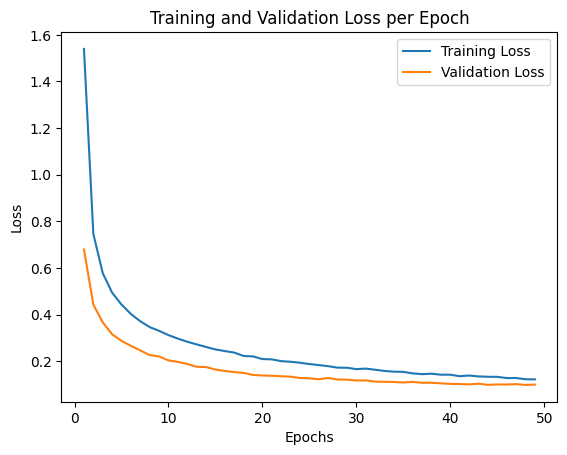

In [ ]:
# TODO: Train the dropout model
# What do you notice ?
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.optim import SGD
import matplotlib.pyplot as plt

# Define the model with dropout
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.2)  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
validation_size = len(dataset) - train_size
train_set, validation_set = random_split(dataset, [train_size, validation_size])

# Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model_with_dropout.parameters(), lr=0.01)

# Set the number of epochs
num_epochs = 50

# Early stopping parameters
patience = 5
min_delta = 0.001
best_loss = None
patience_counter = 0

# Lists to store epoch-wise loss values
train_losses = []
validation_losses = []

# Training loop with early stopping
for epoch in range(num_epochs):
    model_with_dropout.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(-1, 28 * 28)
        optimizer.zero_grad()

        # Forward pass
        outputs = model_with_dropout(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Evaluation phase
    model_with_dropout.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            images = images.view(-1, 28 * 28)
            output = model_with_dropout(images)
            loss = criterion(output, labels)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(validation_loader)

    train_losses.append(training_loss)
    validation_losses.append(validation_loss)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

# Plot the training and validation loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss per Epoch')
plt.show()


## Submitting Your Project on GitHub 🚀


Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
